In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Weather Station Locations.csv', 'Summary of Weather.csv']


# Import Data

In [2]:
df_stations = pd.read_csv('../input/Weather Station Locations.csv')
df_stations.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [3]:
df_weather = pd.read_csv('../input/Summary of Weather.csv')
df_weather.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [5]:
# view a column
df_weather['PRCP']

0         0.04
1            0
2          0.1
3          0.1
4            0
5            0
6            T
7         0.14
8            T
9         0.14
10           0
11        0.02
12           0
13           0
14           0
15           T
16           T
17           T
18           0
19           0
20           T
21           T
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
          ... 
119010    0.96
119011    0.03
119012    1.42
119013    0.49
119014       T
119015       0
119016    0.03
119017       0
119018       T
119019    0.01
119020       0
119021    0.76
119022       0
119023    0.03
119024       0
119025       0
119026    0.78
119027     0.4
119028       0
119029       0
119030       0
119031       T
119032       0
119033    0.02
119034       0
119035       0
119036    0.39
119037       0
119038       0
119039       0
Name: PRCP, Length: 119040, dtype: object

In [6]:
# replace all instances of T with 0
df_weather['PRCP'] = df_weather['PRCP'].replace(['T'],0)

In [7]:
# logical indexing
df_weather[ df_weather['PRCP'] == 'T' ]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE


In [8]:
# count entries where PRCP is null
len(df_weather[df_weather['PRCP'].isnull()])

1932

In [9]:
# replace nulls with 0
df_weather['PRCP'] = df_weather['PRCP'].fillna(0)
len(df_weather[df_weather['PRCP'].isnull()])

0

In [10]:
# since we've removed nans and T's, can correctly be floats
df_weather['PRCP'] = df_weather['PRCP'].astype('float')

In [11]:
# cases where null != 0
# we can replace them with the means of each column
df_weather['MAX'] = df_weather['MAX'].fillna(df_weather['MAX'].mean())
df_weather['MIN'] = df_weather['MIN'].fillna(df_weather['MIN'].mean())
df_weather['MEA'] = df_weather['MEA'].fillna(df_weather['MEA'].mean())

In [12]:
# similar to PRCP
df_weather['SNF'] = df_weather['SNF'].replace(['T'], 0)
df_weather['SNF'] = df_weather['SNF'].fillna(0)
df_weather['SNF'] = df_weather['SNF'].astype('float')

In [13]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           119040 non-null float64
DR             533 non-null float64
SPD            532 non-null float64
MAX            119040 non-null float64
MIN            119040 non-null float64
MEA            119040 non-null float64
SNF            119040 non-null float64
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float

In [14]:
# drop columns that contain ANY NaN
# inplace -> modify df_weather instead of returning new dataframe
df_weather.dropna(axis=1, how='any',inplace = True)

In [15]:
# repeat columns, so remove them
df_weather.drop(['Precip', 'MaxTemp','MinTemp','MeanTemp'], axis=1,inplace=True)

In [16]:
# check nulls overall again
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 10 columns):
STA     119040 non-null int64
Date    119040 non-null object
YR      119040 non-null int64
MO      119040 non-null int64
DA      119040 non-null int64
PRCP    119040 non-null float64
MAX     119040 non-null float64
MIN     119040 non-null float64
MEA     119040 non-null float64
SNF     119040 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 9.1+ MB


# Example Join

In [17]:
df_stations

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
5,11604,ST JOHNS/COOLIDGE FIELD,AT,1707N,06147W,10,17.116667,-61.733333
6,82502,AMBERLY,AU,2736S,15243E,27,-27.600000,152.816667
7,82501,ARCHER,AU,2735S,15301E,19,-27.583333,153.000000
8,82506,BRISBANE,AU,2726S,15305E,2,-27.433333,153.133333
9,82402,CHARLEVILLE,AU,2625S,14616E,300,-26.416667,146.216667


In [18]:
df_weather.head()

,STA,Date,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,42,7,1,0.04,78.0,72.0,75.0,0.0
1,10001,1942-7-2,42,7,2,0.00,84.0,71.0,78.0,0.0
2,10001,1942-7-3,42,7,3,0.10,79.0,72.0,76.0,0.0
3,10001,1942-7-4,42,7,4,0.10,80.0,72.0,76.0,0.0
4,10001,1942-7-5,42,7,5,0.00,80.0,71.0,76.0,0.0


**STA and WBAN seem similar, so let's verify with an example:**

In [19]:
df_stations[df_stations.WBAN == 10001]

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
48,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3


In [20]:
df = pd.merge(df_weather, df_stations, left_on=  ['STA'],
                   right_on= ['WBAN'], 
                   how = 'left')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 18 columns):
STA                 119040 non-null int64
Date                119040 non-null object
YR                  119040 non-null int64
MO                  119040 non-null int64
DA                  119040 non-null int64
PRCP                119040 non-null float64
MAX                 119040 non-null float64
MIN                 119040 non-null float64
MEA                 119040 non-null float64
SNF                 119040 non-null float64
WBAN                119040 non-null int64
NAME                119040 non-null object
STATE/COUNTRY ID    119040 non-null object
LAT                 119040 non-null object
LON                 119040 non-null object
ELEV                119040 non-null int64
Latitude            119040 non-null float64
Longitude           119040 non-null float64
dtypes: float64(7), int64(6), object(5)
memory usage: 17.3+ MB


# Visualizations

In [22]:
# popular libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

### Pandas Plots

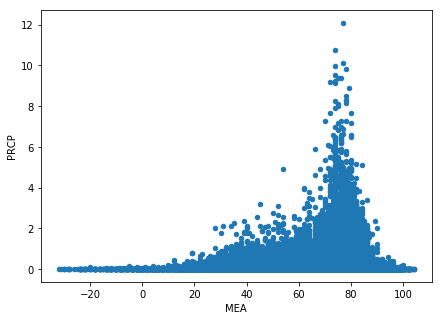

In [23]:
df.plot(x='MEA',y = 'PRCP', kind = 'scatter')

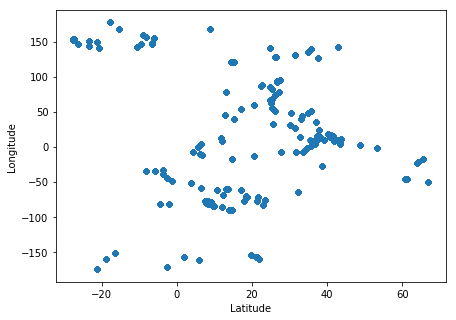

In [35]:
df.plot(x='Latitude',y = 'Longitude', kind = 'scatter')

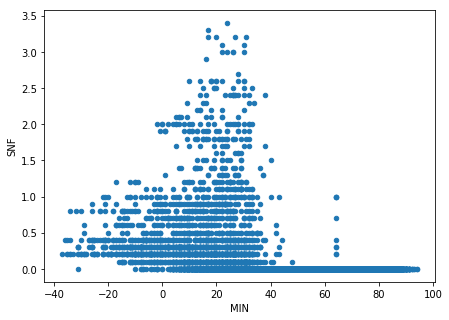

In [25]:
df.plot(x='MIN',y = 'SNF', kind = 'scatter')

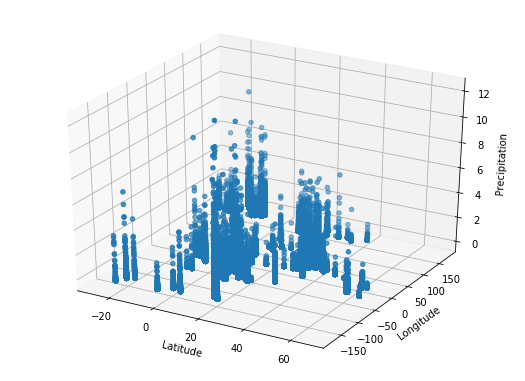

In [37]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(df['Latitude'],df['Longitude'],df['PRCP'])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Precipitation')
plt.show()

**Time Series Code**

In [38]:
df

,STA,Date,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,42,7,1,0.04,78.0,72.0,75.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
1,10001,1942-7-2,42,7,2,0.00,84.0,71.0,78.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
2,10001,1942-7-3,42,7,3,0.10,79.0,72.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
3,10001,1942-7-4,42,7,4,0.10,80.0,72.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
4,10001,1942-7-5,42,7,5,0.00,80.0,71.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
5,10001,1942-7-6,42,7,6,0.00,80.0,71.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
6,10001,1942-7-7,42,7,7,0.00,83.0,73.0,78.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
7,10001,1942-7-8,42,7,8,0.14,80.0,72.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
8,10001,1942-7-9,42,7,9,0.00,81.0,73.0,77.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
9,10001,1942-7-10,42,7,10,0.14,78.0,71.0,74.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000


In [ ]:
# b/c we have multiple stations, we should focus on one
# also make sure to sort!

In [39]:
df_sta = df[ df['STA'] == 10001 ]
df_sta['Date'] = pd.to_datetime(df_sta['Date']).dt.date
df_sta = df_sta.sort_values('Date')
df_sta

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STA,Date,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-07-01,42,7,1,0.04,78.0,72.0,75.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
1,10001,1942-07-02,42,7,2,0.00,84.0,71.0,78.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
2,10001,1942-07-03,42,7,3,0.10,79.0,72.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
3,10001,1942-07-04,42,7,4,0.10,80.0,72.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
4,10001,1942-07-05,42,7,5,0.00,80.0,71.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
5,10001,1942-07-06,42,7,6,0.00,80.0,71.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
6,10001,1942-07-07,42,7,7,0.00,83.0,73.0,78.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
7,10001,1942-07-08,42,7,8,0.14,80.0,72.0,76.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
8,10001,1942-07-09,42,7,9,0.00,81.0,73.0,77.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
9,10001,1942-07-10,42,7,10,0.14,78.0,71.0,74.0,0.0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3


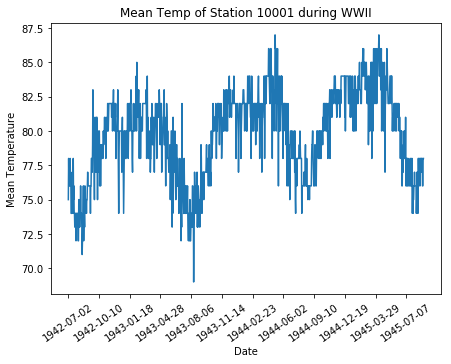

In [44]:
# setup x and y axis
x = np.linspace(1,len(df_sta),len(df_sta))
y = df_sta['MEA']
# set up tickmarks
locs = np.arange(1,len(df_sta), step=100)
plt.xticks(locs,df_sta['Date'][locs],rotation = 35)
# labels
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temp of Station 10001 during WWII')
plt.plot(x,y)

## Advanced Methods

### Principal Component Analysis for Dimension Reduction

In [42]:
from sklearn.decomposition import PCA

In [49]:
# prep data into numpy array
lats = df['Latitude']
longs = df['Longitude']
prcp = df['PRCP']
X = np.asarray([lats, longs, prcp]).T
X.shape

(119040, 3)

In [50]:
# fit the model
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
# reduced data
X_pca = pca.transform(X)

In [55]:
# array slicing
first_component = X_pca[:,0]
second_component = X_pca[:,1]

Text(0.5,1,'PCA Reduction')

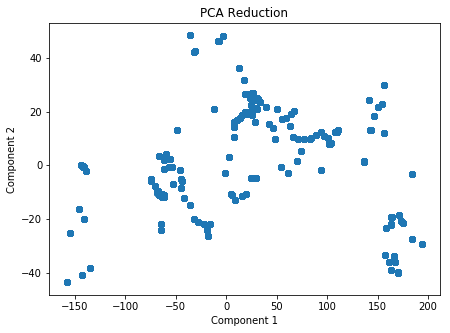

In [59]:
# visualization
plt.scatter(first_component,second_component)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Reduction')

### Clustering with K-means

In [61]:
from sklearn.cluster import KMeans

In [65]:
model = KMeans(n_clusters = 6)
clusters = model.fit_predict(X_pca)

Text(0.5,1,'PCA Clusters')

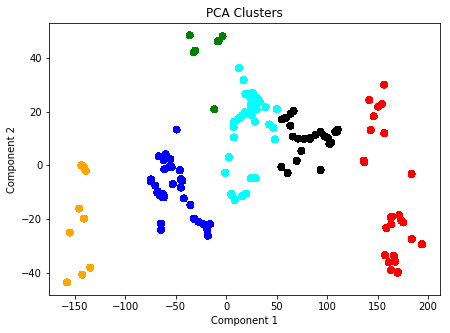

In [69]:
# visualization
colors = ['red','green','blue','cyan','black','orange']
c = [colors[i] for i in clusters]
plt.scatter(first_component,second_component,c = c)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Clusters')